In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import utils, wave, propagator

m = 1
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

N = 1024

Text(0.5, 1.0, 'Fraunhofer diffraction, z = 5m')

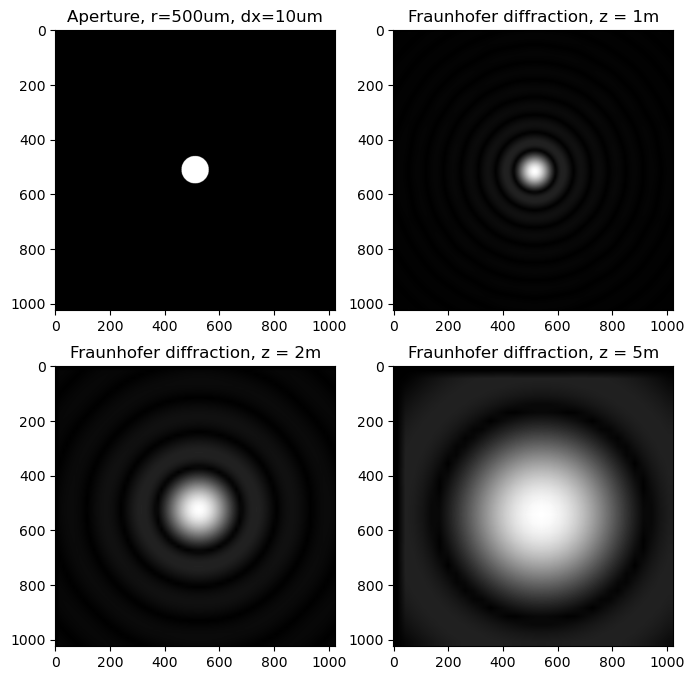

In [2]:
source_resolution = 10*um
lam = 633*nm
z_list = [1*m, 2*m, 5*m]
fraunhofer_abs_list = []

# Define aperture
x = source_resolution * np.arange(-N/2, N/2)
y = source_resolution * np.arange(-N/2, N/2)
X, Y = np.meshgrid(x, y)

aperture = np.zeros((N, N))
aperture[np.sqrt(X**2 + Y**2) <= 500*um] = 1

for z_idx, z in enumerate(z_list):
    # Fresnel propagation
    fraunhofer, dx = propagator.Fraunhofer.propagate(source=aperture, source_resolution=source_resolution, lam=lam, z=z)
    fraunhofer_abs = np.abs(fraunhofer)
    fraunhofer_abs = utils.Resizer.resize(source=fraunhofer_abs, original_resolution=dx, target_resolution=10*um)
    fraunhofer_abs_list.append(fraunhofer_abs)
    
fig, axes = plt.subplots(2,2, figsize=(8,8))
axes[0,0].imshow(aperture, 'gray')
axes[0,0].set_title('Aperture, r=500um, dx=10um')
axes[0,1].imshow(np.abs(fraunhofer_abs_list[0]), 'gray')
axes[0,1].set_title('Fraunhofer diffraction, z = ' + str(z_list[0]) + 'm')
axes[1,0].imshow(np.abs(fraunhofer_abs_list[1]), 'gray')
axes[1,0].set_title('Fraunhofer diffraction, z = ' + str(z_list[1]) + 'm')
axes[1,1].imshow(np.abs(fraunhofer_abs_list[2]), 'gray')
axes[1,1].set_title('Fraunhofer diffraction, z = ' + str(z_list[2]) + 'm')

Text(0.5, 1.0, 'Fresnel diffraction, z = 1m')

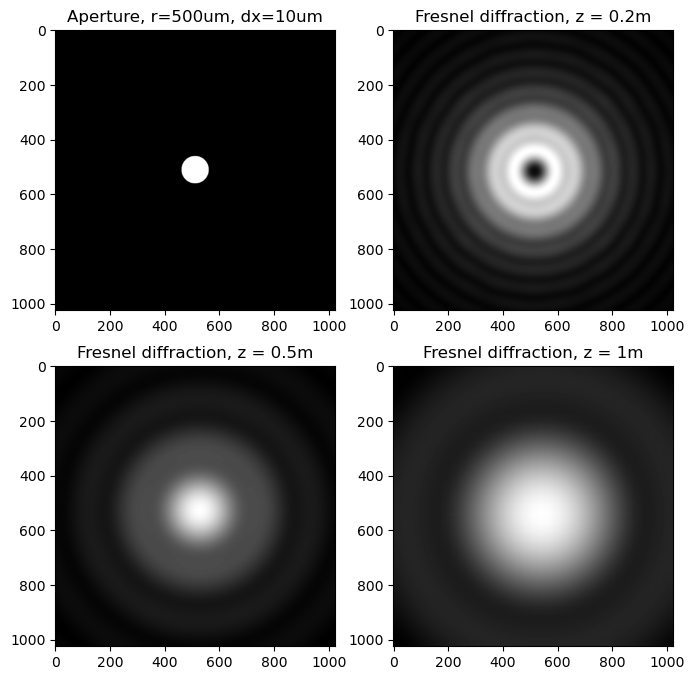

In [3]:
source_resolution = 10*um
lam = 633*nm
z_list = [0.2*m, 0.5*m, 1*m]
fresnel_abs_list = []

# Define aperture
x = source_resolution * np.arange(-N/2, N/2)
y = source_resolution * np.arange(-N/2, N/2)
X, Y = np.meshgrid(x, y)

aperture = np.zeros((N, N))
aperture[np.sqrt(X**2 + Y**2) <= 500*um] = 1

for z_idx, z in enumerate(z_list):
    # Fresnel propagation
    fresnel, dx = propagator.Fresnel.propagate(source=aperture, source_resolution=source_resolution, lam=lam, z=z)
    fresnel_abs = np.abs(fresnel)
    fresnel_abs = utils.Resizer.resize(source=fresnel_abs, original_resolution=dx, target_resolution=2*um)
    fresnel_abs_list.append(fresnel_abs)
    
fig, axes = plt.subplots(2,2, figsize=(8,8))
axes[0,0].imshow(aperture, 'gray')
axes[0,0].set_title('Aperture, r=500um, dx=10um')
axes[0,1].imshow(np.abs(fresnel_abs_list[0]), 'gray')
axes[0,1].set_title('Fresnel diffraction, z = ' + str(z_list[0]) + 'm')
axes[1,0].imshow(np.abs(fresnel_abs_list[1]), 'gray')
axes[1,0].set_title('Fresnel diffraction, z = ' + str(z_list[1]) + 'm')
axes[1,1].imshow(np.abs(fresnel_abs_list[2]), 'gray')
axes[1,1].set_title('Fresnel diffraction, z = ' + str(z_list[2]) + 'm')